<a href="https://colab.research.google.com/github/SatenikDavtyan/ML-project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


 1.Rows and columns: (545, 13)

 2.Column data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

 3.Summary statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000 

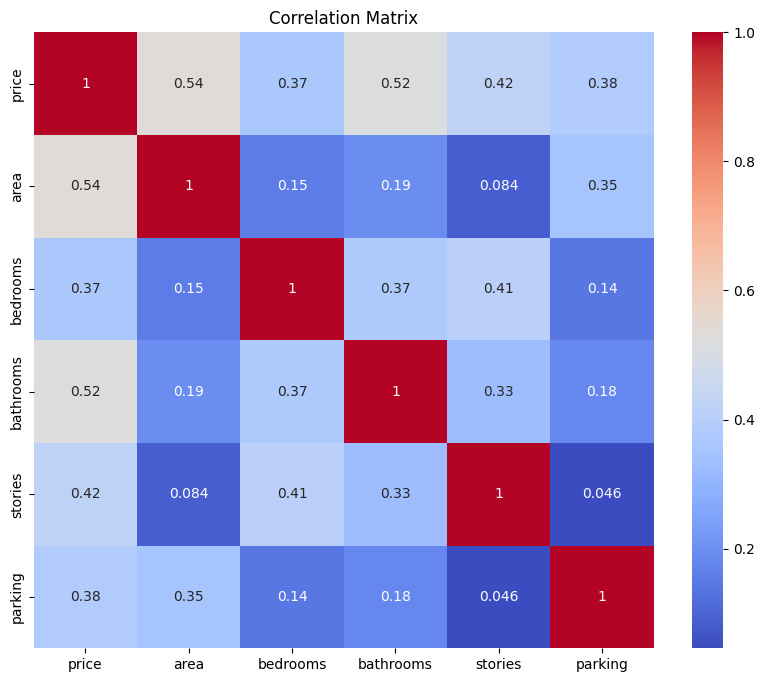

In [3]:
#  1. Տողերի և սյունակների քանակը
print(" 1.Rows and columns:", df.shape)

#  2. Սյունակների տվյալների տիպերը
print("\n 2.Column data types:")
print(df.dtypes)

#  3. Վիճակագրական ամփոփ տվյալներ
print("\n 3.Summary statistics:")
print(df.describe())

#  4. Կոռելացիա
print("\n 4.Correlation matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# 5. Բացակայող արժեքների ստուգում
print("\n Missing values per column:")
print(df.isnull().sum())

#  Fill missing values with column mean (for numerical columns)
# df.fillna(df.mean(numeric_only=True), inplace=True)

#  6. Կատեգորիկ սյունակների վերածում թվայինի (if exists)
df = pd.get_dummies(df, drop_first=True)
print(df)





 Missing values per column:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
price_log                          0
dtype: int64
        price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2          True   
1    12250000  8960         4          4        4        3          True   
2    12250000  9960         3          2        2        2          True   
3    12215000  7500         4          2        2        3          True   
4    11410000  7420    

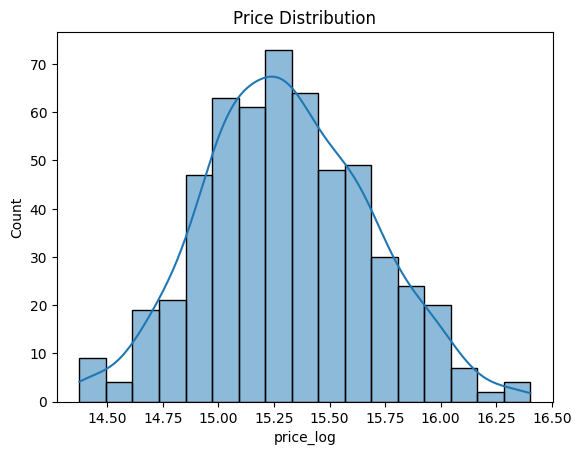

In [9]:
# 📊 7. Տեսողական վերլուծություն՝ գների բաշխում
if 'price_log' in df.columns:
    sns.histplot(df['price_log'], kde=True)
    plt.title("Price Distribution")
    plt.xlabel("price_log")
    plt.ylabel("Count")
    plt.show()

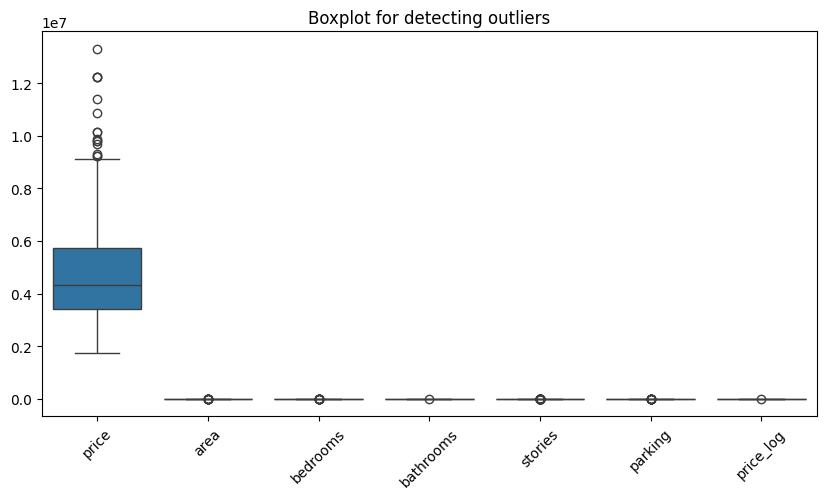

Ծայրահեղ գներ ունեցող տների քանակը՝ 15


In [10]:
# 8. Ստուգել ծայրահեղ արժեքները
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot for detecting outliers")
plt.xticks(rotation=45)
plt.show()

#Գտնենք outlier-ների քանակը
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Ծայրահեղ գներ ունեցող տների քանակը՝ {len(outliers)}")
df['price_log'] = np.log(df['price'])

In [11]:
# 9. Նոր սյուներ
df['price_per_m2'] = df['price_log'] / df['area']
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  \
0          True                            Fal

In [ ]:
# from sklearn.preprocessing import StandardScaler

# 10. Տվյալների նորմավորում

# # Ընտրում ենք միայն թվային սյուները
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# # Ստեղծում ենք նորմավորող օբյեկտ
# scaler = StandardScaler()

# # Նորմավորում կատարում ենք միայն թվային սյուների վրա
# df_scaled = df.copy()
# df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# # Ցույց ենք տալիս նորմավորված տվյալների առաջին տողերը
# print("Նորմավորված տվյալների տեսք՝")
# print(df_scaled.head())

Ռեգրեսիայի մոդել

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split

# Սահմանում ենք կախյալ (y) և անկախ (X) փոփոխականները նորմավորված տվյալներից
X = df.drop('price', axis=1)  # անկախ փոփոխականներ (նորմավորված)
y = df['price']               # կախյալ փոփոխական (նորմավորված)

# Տվյալների բաժանում train և test մասերի (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Տպել ստացված մասերի չափսերը՝ ստուգման համար
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 15)
X_test shape: (109, 15)
y_train shape: (436,)
y_test shape: (109,)


In [15]:
from sklearn.linear_model import LinearRegression

# Ստեղծում ենք գծային ռեգրեսիայի մոդելը
model = LinearRegression()

# Մարզում ենք մոդելը train տվյալների վրա
model.fit(X_train, y_train)

#  Տպում ենք մոդելի ազատ անդամը և գործակիցները
print(" Intercept (ազատ անդամ):", model.intercept_)
print("\n Coefficients (գործակիցներ):")

# Ֆորմատավորված տպում՝ ֆիչերի անունների հետ
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

 Intercept (ազատ անդամ): -68472377.55403967

 Coefficients (գործակիցներ):
area: 34.29228540823933
bedrooms: -19929.49521282781
bathrooms: 205542.3450604623
stories: 13071.447626752692
parking: 51867.55521525582
mainroad_yes: -139833.43177600345
guestroom_yes: -8544.010750698973
basement_yes: -88133.7088690391
hotwaterheating_yes: 62173.96500598505
airconditioning_yes: 51038.07330370287
prefarea_yes: 17039.133867810015
furnishingstatus_semi-furnished: -124916.3069721103
furnishingstatus_unfurnished: 113748.53732271591
price_log: 4751561.018807885
price_per_m2: 53893442.2523383


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  Կանխատեսումներ
y_pred = model.predict(X_test)
print(y_pred)

comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Տպել առաջին 10 արդյունքները
print(comparison_df.head(10))

#  Ճշգրտության չափանիշներ
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#  Տպում ենք արդյունքները
print(" Mean Absolute Error (MAE):", mae)
print(" Mean Squared Error (MSE):", mse)
print(" Root Mean Squared Error (RMSE):", rmse)

[ 4606983.34702484  6847162.99893035  3656645.20947345  6321417.09097049
  2421986.81054881  5210940.35450521  5615850.55261296  4839482.42568663
  2122324.15559208  3472894.75538279  9076302.72564867  2311682.59166251
  3620294.04254435  3257880.14569546  1471077.25515901  2853746.43837711
  2215746.61023887  7247286.43625593  2744359.42037129  2435814.9072201
  6805958.06238146  5429805.42005512   688848.24180995  5519843.33446528
  4327899.76396306  9653217.23653862  2940570.69410479  5444904.29942907
  8651868.20636274  1984198.41493952  6715996.81272838  3690397.31411807
  6815288.49166529  2552326.38385688  3340838.78501831  4543770.50856321
  4976432.81101377  3283597.7789544   3801749.27222142  1890117.61114578
  5645030.921471    3909900.15588596  6846042.76077922  5156641.99851407
  2889761.72047782  4896052.29644707  6661611.05382921  5754987.57886319
  2926313.50700112   548366.46919641  8188843.39068556  2002381.34381315
  4533429.7211892   4115111.16893283  3134366.413458

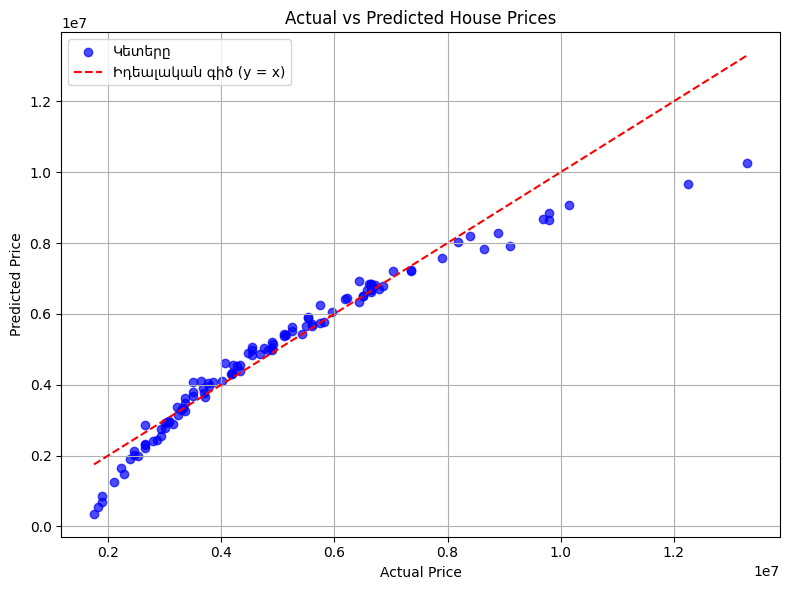

In [19]:
#Սա ցույց է տալիս՝ որքան մոտ են մոդելի կանխատեսումները իրական գներին։
#Եթե կետերը մոտ են կարմիր գծին՝ նշանակում է մոդելն աշխատում է լավ։
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Կետերը')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Իդեալական գիծ (y = x)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()